## PREDICTING CUSTOMER CHURN AT SYRIATEL

### INTRODUCTION

Syriatel is a telecommunications company providing mobile network services in Syria. The company seeks to be able to predict which customers are likely to drop them as their mobile network provider so as to put measures forehand to incentivize them. They have records in their database detailing customer mobile services usage over the past couple of years and whether they churned or not. Using this data, we are tasked to do an analysis and develop a machine learning model that will predict whether a customer will drop their services or not.

### OBJECTIVES

1. To analyze customer data from Syriatel and understand which features are likely to predict customer churn.
2. To clean up the data and come up with a suitable predictive model that will classify a customer as likely to churn or not.
3. To evaluate the performance of the model interpreting its results and limitations.

### DATA UNDERSTANDING

We will be using data from the file ```syriatel_customer_churn.csv``` in the ```data``` folder. The data contains various features that we shall analyze to predict whether a customer would continue using Syriatel services or would churn. These features are listed below and include number and length of calls made by a customer at various times and which plans they have subscribed to. The target feature is the ```churn``` column which tells us whether or not the customer churned.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("data/syriatel_customer_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
df.shape

(3333, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We see that the data has 21 columns and 3333 rows, none of which are null.

### DATA PREPARATION

To avoid the risk of data leakage, we first split our data into train and test sets. We shall then prep our train set and use it to train our models. Later when we have our final model, we'll apply the same transformations to our test set.

In [4]:
from sklearn.model_selection import train_test_split

y = df["churn"]
X = df.drop(columns=["churn"], axis=1)

seed = 2024
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

Next we convert ```y_train``` to ```int``` values.

In [5]:
y_train.value_counts()

False    1986
True      347
Name: churn, dtype: int64

In [6]:
y_train = y_train.astype(int)

In [7]:
y_train.value_counts()

0    1986
1     347
Name: churn, dtype: int64

Separating continous and categorical variables in ```X_train```

In [8]:
X_train_cat = ["international plan", "voice mail plan"]
X_train_cont = df.columns[4:-1].difference(X_train_cat)

We have chosen to drop the columns ``` state```, ```account length```, ```area code```, and ```phone number``` as we presume they would not have a major impact in determining our target.

Transforming categorical variables.

In [9]:
X_train_cat_ohe = pd.get_dummies(X_train[X_train_cat], prefix=X_train_cat, drop_first=True)
X_train_cat_ohe.head()

,international plan_yes,voice mail plan_yes
2403,0,0
87,0,0
3180,1,0
3266,0,1
3055,0,0


Let's check for strong correlations in continuous variables.

In [10]:
X_train_cont_df = X_train.loc[:, X_train_cont]
X_train_cont_df.head()

,customer service calls,number vmail messages,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes
2403,2,0,109,15.62,91.9,111,16.86,198.4,7,3.51,13.0,125,7.73,171.7
87,1,0,118,36.43,214.3,76,17.72,208.5,2,3.24,12.0,98,8.21,182.4
3180,1,0,115,25.81,151.8,116,8.81,103.6,4,3.29,12.2,86,7.03,156.3
3266,3,33,139,26.38,155.2,79,22.81,268.3,4,2.62,9.7,71,8.39,186.4
3055,2,0,80,29.82,175.4,127,16.78,197.4,2,2.62,9.7,102,8.47,188.2


In [11]:
abs(X_train_cont_df.corr()) > 0.75

,customer service calls,number vmail messages,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes
customer service calls,True,False,False,False,False,False,False,False,False,False,False,False,False,False
number vmail messages,False,True,False,False,False,False,False,False,False,False,False,False,False,False
total day calls,False,False,True,False,False,False,False,False,False,False,False,False,False,False
total day charge,False,False,False,True,True,False,False,False,False,False,False,False,False,False
total day minutes,False,False,False,True,True,False,False,False,False,False,False,False,False,False
total eve calls,False,False,False,False,False,True,False,False,False,False,False,False,False,False
total eve charge,False,False,False,False,False,False,True,True,False,False,False,False,False,False
total eve minutes,False,False,False,False,False,False,True,True,False,False,False,False,False,False
total intl calls,False,False,False,False,False,False,False,False,True,False,False,False,False,False
total intl charge,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [12]:
df_corr = X_train_cont_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993


We choose to drop the ```charge``` features as they can be seen to be very strongly correlated with the ```minutes``` features.

In [13]:
to_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
X_train_cont = df.columns[4:-1].difference(X_train_cat + to_drop)
X_train_cont

Index(['customer service calls', 'number vmail messages', 'total day calls',
       'total day minutes', 'total eve calls', 'total eve minutes',
       'total intl calls', 'total intl minutes', 'total night calls',
       'total night minutes'],
      dtype='object')

We then scale continious variables.

In [14]:
X_train_cont_df = X_train.loc[:, X_train_cont]
X_train_cont_df.head()

,customer service calls,number vmail messages,total day calls,total day minutes,total eve calls,total eve minutes,total intl calls,total intl minutes,total night calls,total night minutes
2403,2,0,109,91.9,111,198.4,7,13.0,125,171.7
87,1,0,118,214.3,76,208.5,2,12.0,98,182.4
3180,1,0,115,151.8,116,103.6,4,12.2,86,156.3
3266,3,33,139,155.2,79,268.3,4,9.7,71,186.4
3055,2,0,80,175.4,127,197.4,2,9.7,102,188.2


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_cont_df)
X_train_cont_scaled = scaler.transform(X_train_cont_df)
X_train_cont_scaled

array([[ 0.34443674, -0.59004295,  0.43843642, ...,  0.9741809 ,
         1.25617566, -0.57860761],
       [-0.42379549, -0.59004295,  0.88816037, ...,  0.62048184,
        -0.11402575, -0.36640043],
       [-0.42379549, -0.59004295,  0.73825239, ...,  0.69122165,
        -0.72300415, -0.8840273 ],
       ...,
       [ 1.11266898, -0.59004295,  0.63831373, ..., -0.47598524,
         0.69794546, -0.14427702],
       [-0.42379549, -0.59004295,  0.83819104, ..., -0.08691628,
         1.05318286, -0.80271427],
       [ 0.34443674, -0.59004295,  1.08803769, ..., -0.47598524,
        -0.67225595, -0.61827251]])

In [16]:
X_train_cont_scaled_df = pd.DataFrame(
    X_train_cont_scaled, index=X_train_cont_df.index, columns=X_train_cont_df.columns)

Combining the preprocessed continuous and categorical data into one data frame.

In [17]:
X_train_preprocessed = pd.concat([X_train_cat_ohe, X_train_cont_scaled_df], axis=1)
X_train_preprocessed.head()

,international plan_yes,voice mail plan_yes,customer service calls,number vmail messages,total day calls,total day minutes,total eve calls,total eve minutes,total intl calls,total intl minutes,total night calls,total night minutes
2403,0,0,0.344437,-0.590043,0.438436,-1.559802,0.539219,-0.064116,1.008057,0.974181,1.256176,-0.578608
87,0,0,-0.423795,-0.590043,0.888160,0.636415,-1.220078,0.134515,-1.014124,0.620482,-0.114026,-0.366400
3180,1,0,-0.423795,-0.590043,0.738252,-0.485019,0.790547,-1.928493,-0.205252,0.691222,-0.723004,-0.884027
3266,0,1,1.112669,1.823838,1.937516,-0.424013,-1.069281,1.310567,-0.205252,-0.193026,-1.484227,-0.287071
3055,0,0,0.344437,-0.590043,-1.010674,-0.061566,1.343469,-0.083783,-1.014124,-0.193026,0.088967,-0.251372


In [18]:
X_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 2403 to 2656
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan_yes  2333 non-null   uint8  
 1   voice mail plan_yes     2333 non-null   uint8  
 2   customer service calls  2333 non-null   float64
 3   number vmail messages   2333 non-null   float64
 4   total day calls         2333 non-null   float64
 5   total day minutes       2333 non-null   float64
 6   total eve calls         2333 non-null   float64
 7   total eve minutes       2333 non-null   float64
 8   total intl calls        2333 non-null   float64
 9   total intl minutes      2333 non-null   float64
 10  total night calls       2333 non-null   float64
 11  total night minutes     2333 non-null   float64
dtypes: float64(10), uint8(2)
memory usage: 205.0 KB


### MODELLING

We begin with a vanilla Decision Tree model.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [20]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=seed)
dt.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2024)

We then use this model to make predictions and see how it performs using the training data. We use the AUC metric to check the predictive performance.

In [21]:
y_hat_train = dt.predict(X_train_preprocessed)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_hat_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

This model looks to have perfect score on the training data. Next we investigate its performance on unseen test data to determine if the model overfits. But first, we need to preprocess test data as well.

In [22]:
y_test = y_test.astype(int)

X_test_cat = ["international plan", "voice mail plan"]
X_test_cont = X_train_cont

X_test_cat_ohe = pd.get_dummies(X_test[X_test_cat], prefix=X_test_cat, drop_first=True)

X_test_cont_df = X_test.loc[:, X_test_cont]
X_test_cont_scaled = scaler.transform(X_test_cont_df)

X_test_cont_scaled_df = pd.DataFrame(
    X_test_cont_scaled, index=X_test_cont_df.index, columns=X_test_cont_df.columns)

X_test_preprocessed = pd.concat([X_test_cat_ohe, X_test_cont_scaled_df], axis=1)
X_test_preprocessed

,international plan_yes,voice mail plan_yes,customer service calls,number vmail messages,total day calls,total day minutes,total eve calls,total eve minutes,total intl calls,total intl minutes,total night calls,total night minutes
1452,0,0,0.344437,-0.590043,1.787608,-0.608826,0.740282,-0.990405,-0.609688,0.726592,-1.382731,1.021871
391,0,0,-1.192028,-0.590043,1.437823,-1.313983,1.444001,1.111936,-0.609688,-0.546725,-1.179738,0.242456
2090,0,1,0.344437,2.116429,0.188590,0.801490,-0.063969,0.657642,0.199184,0.125303,-0.520011,-1.205313
230,1,0,-1.192028,-0.590043,0.438436,2.389440,-0.013703,-1.421100,-1.014124,0.089933,-1.331983,0.331702
2244,0,0,-0.423795,-0.590043,-0.810797,1.084988,-0.767688,-0.117215,-0.609688,0.231413,0.190463,0.629188
...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,1,-0.423795,1.092359,-2.409815,1.985724,0.539219,-0.689508,-0.205252,-0.263766,-0.621508,-1.621794
2542,0,0,-0.423795,-0.590043,0.788222,1.445641,0.438688,1.338100,-0.609688,-0.263766,1.509917,-0.507211
1789,0,0,-1.192028,-0.590043,-0.510981,0.871467,1.745594,-2.526353,1.008057,-1.961521,-0.063278,-1.716990
742,0,1,2.649133,0.653471,0.588344,0.261407,1.544532,0.765807,-0.609688,0.408262,-0.114026,0.936591


In [23]:
y_pred = dt.predict(X_test_preprocessed)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8340822440087147

Here we see that the test AUC score is significantly lower than the train one. It looks like the model overfits to the training data but is not fit to perform when presented with new data.

We shall try tune different parameters of the model and see whether its performance improves.

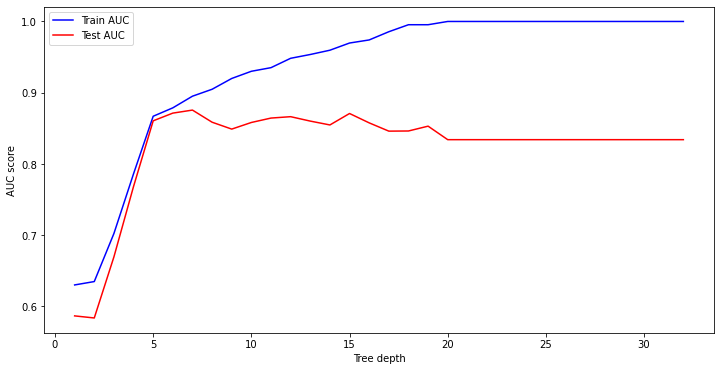

In [24]:
# Find the optimal tree depth 
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

We have investigated different maximum depths of the model to find an optimal hyperparameter. The optimum value seen here is 5. After this value, the model clearly overfits to the training data.

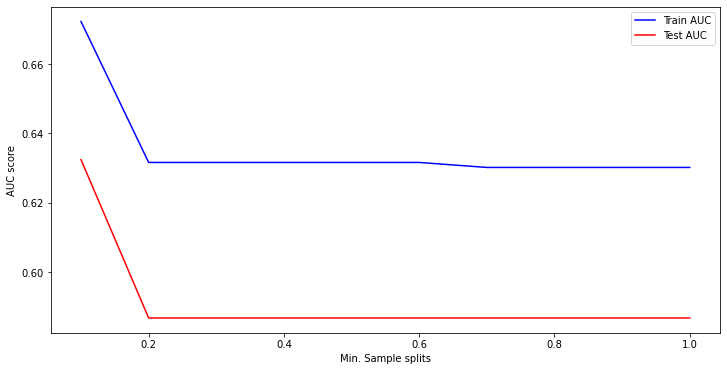

In [25]:
# Find the optimal min-samples-split 
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.ylabel('AUC score')
plt.legend()
plt.show()

The AUC score drops fast up to 0.2 minimum sample splits but levels afterwards and with no clear effect on the dataset.

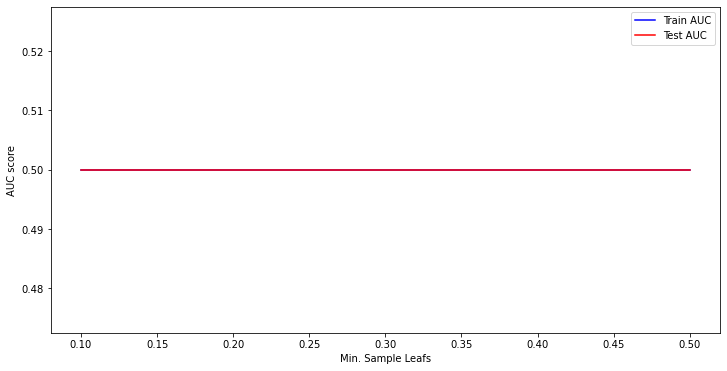

In [26]:
# Find the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

There is no clear effect on the dataset when the minimum sample leaf parameter is changed.

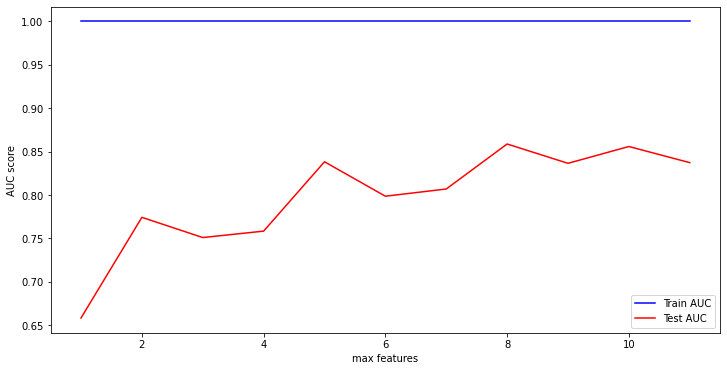

In [27]:
# Find optimal maximum feature size
max_features = list(range(1, X_train_preprocessed.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

The test score seems to increase though with fluctuations as the number of features selected increases.

Let's fit a final decision tree model with the optimal value for maximum depth identified above.

In [28]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
dt.fit(X_train_preprocessed, y_train)

train_pred = dt.predict(X_train_preprocessed)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(false_positive_rate, true_positive_rate)

y_pred = dt.predict(X_test_preprocessed)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
test_roc_auc = auc(false_positive_rate, true_positive_rate)

train_roc_auc, test_roc_auc

(0.8669475957059648, 0.8605324074074073)

This gives us a fairly good model with a 0.86 AUC score on both the train and test sets. It performs well on test data and can therefore generalize to unseen data.

Next we shall try build another model with ```LogisticRegression``` and compare its performance to the Decision Tree classifier above.

In [29]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

We start with a vanilla model.

In [30]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

y_score = logreg.fit(X_train_preprocessed, y_train).decision_function(X_train_preprocessed)
fpr, tpr, thresholds = roc_curve(y_train, y_score)
print('Train AUC: {}'.format(auc(fpr, tpr)))

y_score = logreg.decision_function(X_test_preprocessed)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('Test AUC: {}'.format(auc(fpr, tpr)))

Train AUC: 0.7991168728650988
Test AUC: 0.8123127723311546


Here, we see that the train and test AUC scores are not so far apart, but they are lower than what we have achieved with initial models. We shall proceed to tune hyperparameters.

LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
Train AUC: 0.7473350920419884
Test AUC: 0.7628421160130718
-------------------------------------------------------
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
Train AUC: 0.7615730865336897
Test AUC: 0.7713694852941178
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
Train AUC: 0.7952018597038057
Test AUC: 0.8062193627450981
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
Train AUC: 0.7991168728650988
Test AUC: 0.8123127723311546
-------------------------------------------------------
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
Train AUC: 0.7993258283488744
Test AUC: 0.812780841503268
-------------------------------------------------------
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
Train AUC: 0.79936355642

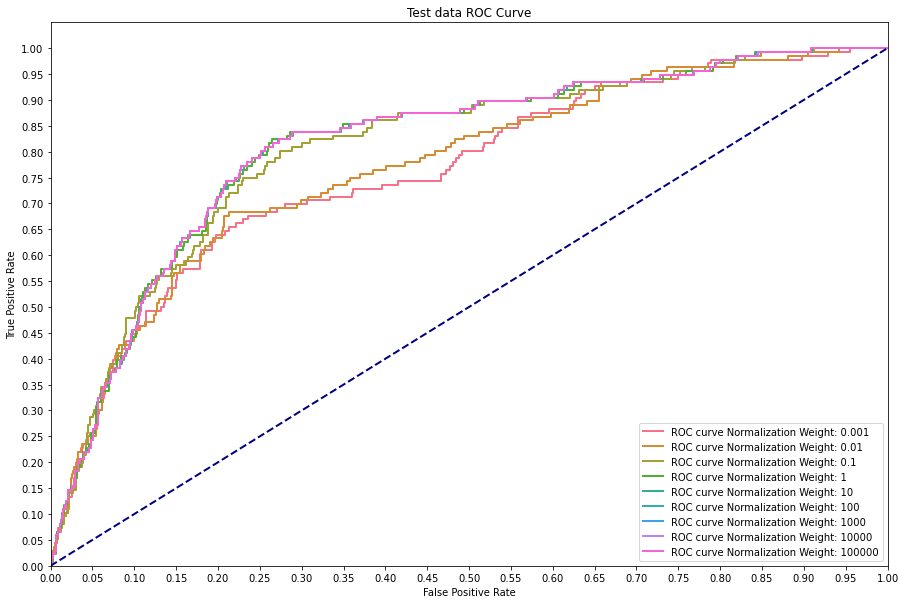

In [31]:
# Compare a different regularization levels 
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
colors = sns.color_palette("husl", 9)
plt.figure(figsize=(15, 10))

for n, c in enumerate(C_param_range):
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_preprocessed, y_train)
    print(model_log)
    
    y_score = logreg.fit(X_train_preprocessed, y_train).decision_function(X_train_preprocessed)
    fpr, tpr, thresholds = roc_curve(y_train, y_score)
    print('Train AUC: {}'.format(auc(fpr, tpr)))

    y_score = logreg.decision_function(X_test_preprocessed)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('Test AUC: {}'.format(auc(fpr, tpr)))
    
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(C_param_range[n]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC Curve')
plt.legend(loc='lower right')
plt.show()

The results above show an optimal C reqularization value of 10, beyond which there is negligible difference in the AUC scores.

Let's review the class imbalance in our dataset and apply Synthetic Minority Oversampling - SMOTE to address it.

In [32]:
print(y_train.value_counts()) 

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_preprocessed, y_train) 

print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

0    1986
1     347
Name: churn, dtype: int64


0    1986
1    1986
Name: churn, dtype: int64


LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.7901262935729848
-------------------------------------------------------
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
AUC for 0.01: 0.8164998638344227
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8361587690631808
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.8381842320261439
-------------------------------------------------------
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
AUC for 10: 0.8385671977124184
-------------------------------------------------------
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
AUC for 100: 0.8386012391067538
-------------------------------------------------------
LogisticRegression(C=1000, fit_intercept=False, solver='liblinear')
AU

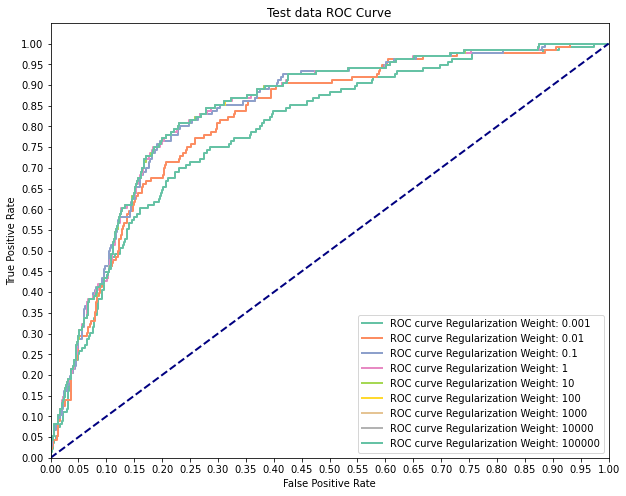

In [33]:
# Comparing different regularization performances once again
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
names = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test_preprocessed)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC Curve')
plt.legend(loc='lower right')
plt.show()

By applying SMOTE we have gotten a slight improvement in the model's performance to a test AUC score of about 0.83. Overally, the tuned Decision Tree model gives the best performance. 

#### Final Model

We select the final model as the one that performed best, i.e. the tuned Decision Tree classifier.

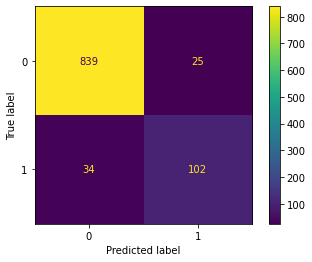

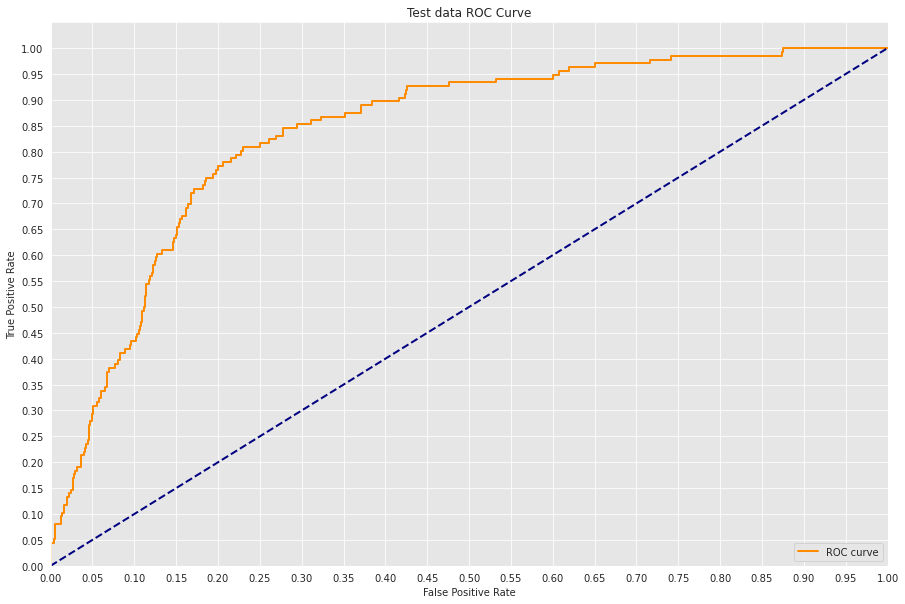

AUC: 0.8605324074074073


In [34]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
dt.fit(X_train_preprocessed, y_train)

y_pred = dt.predict(X_test_preprocessed)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
test_roc_auc = auc(false_positive_rate, true_positive_rate)

# Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.grid(False)
plt.show()

# plot ROC curve
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve')
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC Curve')
plt.legend(loc='lower right')
plt.show();

print(f'AUC: {test_roc_auc}')

In [35]:
# Accuracy score
from sklearn.metrics import accuracy_score

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Accuracy score: 0.941


### EVALUATION

The final model generated above following an iterative approach of trying to improve previous model performances shows a good AUC score of 0.86 on the test data. Its accuracy score on "unseen" test data means that 94% of the time, this model will give the correct prediction on whether a customer would churn or not. Given the business problem of trying to catch customers likely to churn so as to incentivize them, this model adequately addresses that need. Syriatel will be able to use this model to predict from customer mobile services usage the likelihood of a customer dropping them albeit occasional false positives and false negatives. 